In [1]:
import pandas as pd

import sklearn

import seaborn as sns

import matplotlib.pyplot as plt

import numpy as np

#import data

train_df = pd.read_csv("C:/Users/pfali/Downloads/Space_Titanic/train.csv")
test_df = pd.read_csv("C:/Users/pfali/Downloads/Space_Titanic/test.csv")
combine = [train_df, test_df]

#preview data head

train_df.head()

#preview data type

train_df.info()

#preview info on numerical features

train_df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8693,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Gollux Reedall,True
freq,1,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN


In [2]:
#checking which features contain nulls

train_df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [3]:
#checking which features contain nulls

test_df.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [4]:
#completing Age, HomePlanet, CryoSleep, Destination, VIP

train_df['Age'].fillna(train_df['Age'].median(),inplace=True)
train_df['HomePlanet'].fillna(train_df['HomePlanet'].mode()[0],inplace=True)
train_df['CryoSleep'].fillna(train_df['CryoSleep'].mode()[0],inplace=True)
train_df['Destination'].fillna(train_df['Destination'].mode()[0],inplace=True)
train_df['VIP'].fillna(train_df['VIP'].mode()[0],inplace=True)

test_df['Age'].fillna(test_df['Age'].median(),inplace=True)
test_df['HomePlanet'].fillna(test_df['HomePlanet'].mode()[0],inplace=True)
test_df['CryoSleep'].fillna(test_df['CryoSleep'].mode()[0],inplace=True)
test_df['Destination'].fillna(test_df['Destination'].mode()[0],inplace=True)
test_df['VIP'].fillna(test_df['VIP'].mode()[0],inplace=True)

test_df.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           100
Destination       0
Age               0
VIP               0
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [5]:
#Data type of features – conclusions:
#1.	Seven features are objects: PassengerId, HomePlanet, CryoSleep, Cabin, Destination, VIP, Name.
#2.	Five features are floats: Age, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck.
#3.	The last feature Transported is also our target.
#4.	Object features: 
#a.	PassengerId – this is a unique number and as it is combined with the group passengers travelled with, maybe this feature can be split into these groups.
#b.	HomePlanet – takes three unique values, this can be transformed to numerical feature.
#c.	CryoSleep – this features takes only two values True or False, with False being the top one (… of passengers not in cryosleep).
#d.	Cabin – this combines the cabin number, deck and side – possibly to be split into three separate features.
#e.	Destination – takes three unique values, this can be transformed to numerical feature.
#f.	VIP – takes values of True/False, so can be transformed to numerical feature; most of the passengers didn’t have the VIP status.
#g.	Name – this is a nominal feature consisting of the first name and the last name. It seems not to carry any weight for our analysis, so probably can be excluded, but one must take also into consideration that maybe the passengers shared the last name so maybe the feature should be split into two. Name is not unique, … are duplicates (…%).
#5.	Float features – it is also worth considering if RoomService, ShoppingMall, Spa and VRDeck should be left separated or combined, as they refer to the sum of money spent on amenities:
#a.	Age – to be bucketed, as the range of this feature is quite large.
#b.	Room Service – to be bucketed, as the range of this feature is quite large.
#c.	ShoppingMall – to be bucketed, as the range of this feature is quite large.
#d.	Spa – to be bucketed, as the range of this feature is quite large.
#e.	VRDeck – to be bucketed, as the range of this feature is quite large.
#f.	FoodCourt – to be bucketed, as the range of this feature is quite large.

#Correcting:
#All of the features in train and test datasets (except of the PassengerId and Transported) have null values, which should be completed:
#-	HomePlanet – with mode, as it has only 3 unique values;
#-	CryoSleep – with mode, as it has only 2 unique values;
#-	Cabin
#-	Destination – with mode, as it has only 3 unique values;
#-	VIP – with mode, as it has only 2 unique values;
#-	Age – with median
#-	RoomService – with k-nearest neighbours imputer
#-	ShoppingMall – with k-nearest neighbours imputer
#-	Spa – with k-nearest neighbours imputer
#-	VRDeck – with k-nearest neighbours imputer
#-	FoodCourt – with k-nearest neighbours imputer

#Creating:
#1.	New features will be created to check if they correlate with the output:
#a.	Group and Id from PassengerId
#b.	Deck, Number and Side from Cabin


#convert VIP, Destination, HomePlanet and CryoSleep and Transported 

from sklearn import preprocessing

labelenc = preprocessing.LabelEncoder()

train_df['VIP'] = labelenc.fit_transform(train_df['VIP'])
train_df['Destination'] = labelenc.fit_transform(train_df['Destination'])
train_df['HomePlanet'] = labelenc.fit_transform(train_df['HomePlanet'])
train_df['CryoSleep'] = labelenc.fit_transform(train_df['CryoSleep'])
train_df['Transported'] = labelenc.fit_transform(train_df['Transported'])

test_df['VIP'] = labelenc.fit_transform(test_df['VIP'])
test_df['Destination'] = labelenc.fit_transform(test_df['Destination'])
test_df['HomePlanet'] = labelenc.fit_transform(test_df['HomePlanet'])
test_df['CryoSleep'] = labelenc.fit_transform(test_df['CryoSleep'])

train_df.head(15)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,1,0,B/0/P,2,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,0,0,F/0/S,2,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,1,0,A/0/S,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,1,0,A/0/S,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,0,0,F/1/S,2,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1
5,0005_01,0,0,F/0/P,1,44.0,0,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,1
6,0006_01,0,0,F/2/S,2,26.0,0,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,1
7,0006_02,0,1,G/0/S,2,28.0,0,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,1
8,0007_01,0,0,F/3/S,2,35.0,0,0.0,785.0,17.0,216.0,0.0,Andona Beston,1
9,0008_01,1,1,B/1/P,0,14.0,0,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,1


In [7]:
#completing missing values for RoomService, Spa, VRDeck, FoodCourt, ShoppingMall, Cabin

from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

imputer = KNNImputer(n_neighbors=10)

train_df['Spa'] = imputer.fit_transform(train_df[['Spa']]).ravel()
train_df['FoodCourt'] = imputer.fit_transform(train_df[['FoodCourt']]).ravel()
train_df['VRDeck'] = imputer.fit_transform(train_df[['VRDeck']]).ravel()
train_df['ShoppingMall'] = imputer.fit_transform(train_df[['ShoppingMall']]).ravel()
train_df['RoomService'] = imputer.fit_transform(train_df[['RoomService']]).ravel()

test_df['Spa'] = imputer.fit_transform(test_df[['Spa']]).ravel()
test_df['FoodCourt'] = imputer.fit_transform(test_df[['FoodCourt']]).ravel()
test_df['VRDeck'] = imputer.fit_transform(test_df[['VRDeck']]).ravel()
test_df['ShoppingMall'] = imputer.fit_transform(test_df[['ShoppingMall']]).ravel()
test_df['RoomService'] = imputer.fit_transform(test_df[['RoomService']]).ravel()

In [8]:
#splitting PassengerId into group and id into Id and Group

train_df['Group'] = train_df['PassengerId'].str.split("_",expand=True)[1].str.split(expand=True)
train_df['Id'] = train_df['PassengerId'].str.split("_",expand=True)[0].str.split(expand=True)

test_df['Group'] = test_df['PassengerId'].str.split("_",expand=True)[1].str.split(expand=True)
test_df['Id'] = test_df['PassengerId'].str.split("_",expand=True)[0].str.split(expand=True)

#splitting Cabin into Deck, Number, Side
train_df['Deck'] = train_df['Cabin'].str.split("/",expand=True)[0].str.split(expand=True)
train_df['Number'] = train_df['Cabin'].str.split("/",expand=True)[1].str.split(expand=True)
train_df['Side'] = train_df['Cabin'].str.split("/",expand=True)[2].str.split(expand=True)

test_df['Deck'] = test_df['Cabin'].str.split("/",expand=True)[0].str.split(expand=True)
test_df['Number'] = test_df['Cabin'].str.split("/",expand=True)[1].str.split(expand=True)
test_df['Side'] = test_df['Cabin'].str.split("/",expand=True)[2].str.split(expand=True)

train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Id,Deck,Number,Side
0,0001_01,1,0,B/0/P,2,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,01,0001,B,0,P
1,0002_01,0,0,F/0/S,2,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,01,0002,F,0,S
2,0003_01,1,0,A/0/S,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,01,0003,A,0,S
3,0003_02,1,0,A/0/S,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,02,0003,A,0,S
4,0004_01,0,0,F/1/S,2,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,01,0004,F,1,S


In [9]:
#convert Side, Deck, Group to numerical values
train_df['Side'] = labelenc.fit_transform(train_df['Side'])
train_df['Deck'] = labelenc.fit_transform(train_df['Deck'])
train_df['Group'] = labelenc.fit_transform(train_df['Group'])

test_df['Side'] = labelenc.fit_transform(test_df['Side'])
test_df['Deck'] = labelenc.fit_transform(test_df['Deck'])
test_df['Group'] = labelenc.fit_transform(test_df['Group'])

#completing missing values for Deck, Number, Side

imputer = KNNImputer(n_neighbors=10)

train_df['Deck'] = imputer.fit_transform(train_df[['Deck']]).ravel()
train_df['Number'] = imputer.fit_transform(train_df[['Number']]).ravel()
train_df['Side'] = imputer.fit_transform(train_df[['Side']]).ravel()

test_df['Deck'] = imputer.fit_transform(test_df[['Deck']]).ravel()
test_df['Number'] = imputer.fit_transform(test_df[['Number']]).ravel()
test_df['Side'] = imputer.fit_transform(test_df[['Side']]).ravel()

train_df.describe(include='all')


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Id,Deck,Number,Side
count,8693,8693.000000,8693.000000,8494,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8493,8693.000000,8693.000000,8693,8693.000000,8693.000000,8693.000000
unique,8693,NaN,NaN,6560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8473,NaN,NaN,6217,NaN,NaN,NaN
top,0001_01,NaN,NaN,G/734/S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gollux Reedall,NaN,NaN,4498,NaN,NaN,NaN
freq,1,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,8,NaN,NaN,NaN
mean,NaN,0.649833,0.349362,NaN,1.494306,28.790291,0.022892,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,0.503624,0.517773,NaN,4.389969,600.367671,0.539054
std,NaN,0.795183,0.476796,NaN,0.814966,14.341404,0.149568,659.739364,1594.434978,597.417440,1124.675871,1133.259049,NaN,0.500016,1.054241,NaN,1.842573,505.973797,0.542487
min,NaN,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,0.000000
25%,NaN,0.000000,0.000000,NaN,1.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN,3.000000,173.000000,0.000000
50%,NaN,0.000000,0.000000,NaN,2.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,NaN,5.000000,448.000000,1.000000
75%,NaN,1.000000,1.000000,NaN,2.000000,37.000000,0.000000,78.000000,118.000000,45.000000,89.000000,71.000000,NaN,1.000000,1.000000,NaN,6.000000,983.000000,1.000000


In [10]:
print(train_df.dtypes)

PassengerId      object
HomePlanet        int32
CryoSleep         int64
Cabin            object
Destination       int32
Age             float64
VIP               int64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported       int64
Group             int32
Id               object
Deck            float64
Number          float64
Side            float64
dtype: object


In [11]:
test_df.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           100
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name             94
Group             0
Id                0
Deck              0
Number            0
Side              0
dtype: int64

In [12]:
#create buckets for Age, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck and Number

train_df['AgeBin'] = pd.qcut(train_df['Age'],5)
train_df['RoomServiceBin'] = pd.cut(train_df['RoomService'],12)
train_df['SpaBin'] = pd.cut(train_df['Spa'],12)
train_df['VRDeckBin'] = pd.cut(train_df['VRDeck'],12)
train_df['ShoppingMallBin'] = pd.cut(train_df['ShoppingMall'],12)
train_df['NumberBin'] = pd.cut(train_df['Number'],10)
train_df['FoodCourtBin'] = pd.cut(train_df['FoodCourt'],12)

test_df['AgeBin'] = pd.qcut(test_df['Age'],5)
test_df['RoomServiceBin'] = pd.cut(test_df['RoomService'],12)
test_df['SpaBin'] = pd.cut(test_df['Spa'],12)
test_df['VRDeckBin'] = pd.cut(test_df['VRDeck'],12)
test_df['ShoppingMallBin'] = pd.cut(test_df['ShoppingMall'],12)
test_df['NumberBin'] = pd.cut(test_df['Number'],10)
test_df['FoodCourtBin'] = pd.cut(test_df['FoodCourt'],12)


C:\Users\pfali\Desktop\Pyton\Venv\Lib\Kaggle\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


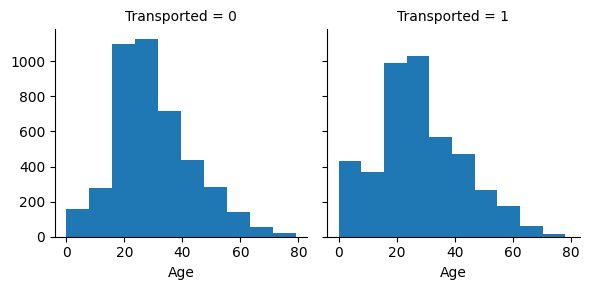

In [13]:
q = sns.FacetGrid(train_df, col='Transported')
q.map(plt.hist,'Age')

C:\Users\pfali\Desktop\Pyton\Venv\Lib\Kaggle\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


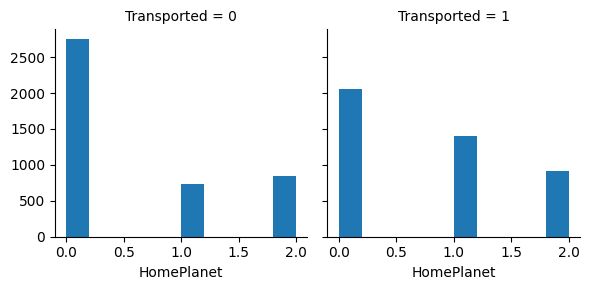

In [14]:
p = sns.FacetGrid(train_df, col='Transported')
p.map(plt.hist,'HomePlanet')

C:\Users\pfali\Desktop\Pyton\Venv\Lib\Kaggle\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


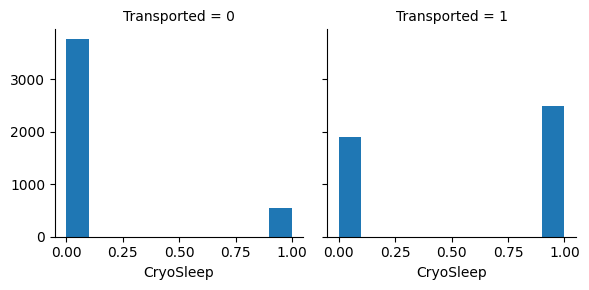

In [15]:
p = sns.FacetGrid(train_df, col='Transported')
p.map(plt.hist,'CryoSleep')

C:\Users\pfali\Desktop\Pyton\Venv\Lib\Kaggle\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


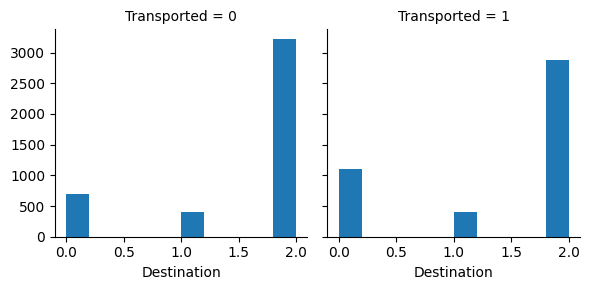

In [16]:
p = sns.FacetGrid(train_df, col='Transported')
p.map(plt.hist,'Destination')

C:\Users\pfali\Desktop\Pyton\Venv\Lib\Kaggle\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


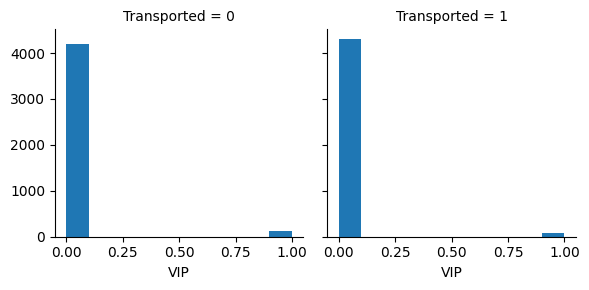

In [17]:
p = sns.FacetGrid(train_df, col='Transported')
p.map(plt.hist,'VIP')

C:\Users\pfali\Desktop\Pyton\Venv\Lib\Kaggle\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


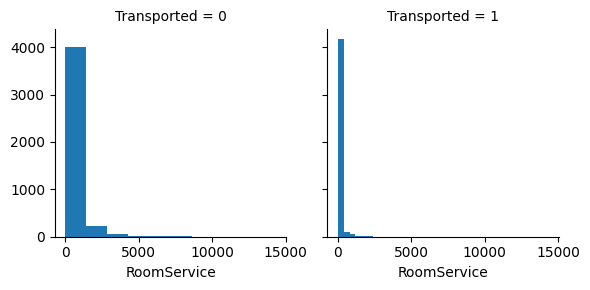

In [18]:
p = sns.FacetGrid(train_df, col='Transported')
p.map(plt.hist,'RoomService')

C:\Users\pfali\Desktop\Pyton\Venv\Lib\Kaggle\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


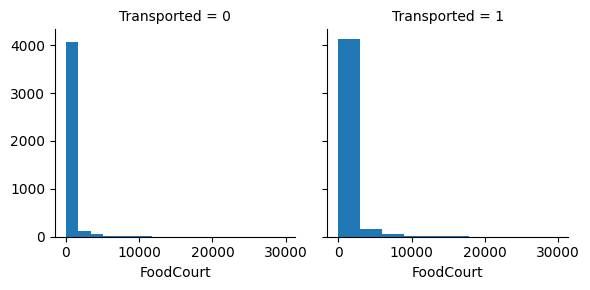

In [19]:
p = sns.FacetGrid(train_df, col='Transported')
p.map(plt.hist,'FoodCourt')

C:\Users\pfali\Desktop\Pyton\Venv\Lib\Kaggle\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


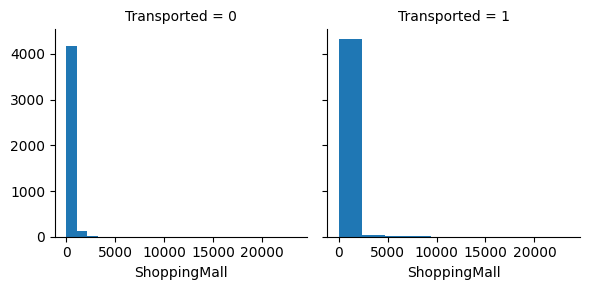

In [20]:
p = sns.FacetGrid(train_df, col='Transported')
p.map(plt.hist,'ShoppingMall')

C:\Users\pfali\Desktop\Pyton\Venv\Lib\Kaggle\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


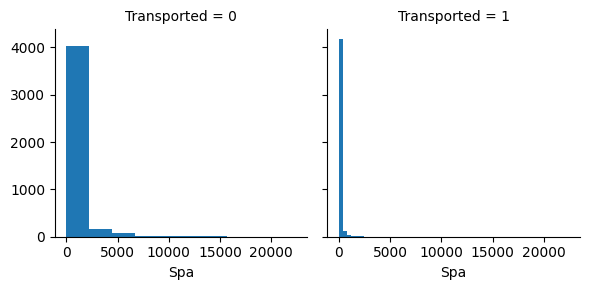

In [21]:
p = sns.FacetGrid(train_df, col='Transported')
p.map(plt.hist,'Spa')

C:\Users\pfali\Desktop\Pyton\Venv\Lib\Kaggle\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


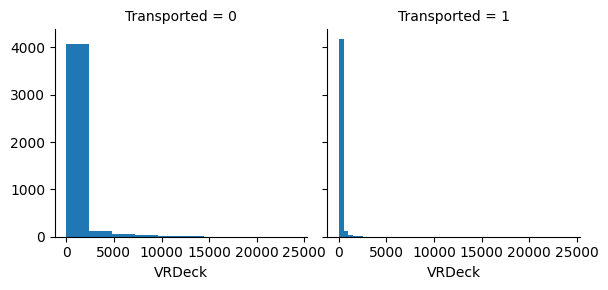

In [22]:
p = sns.FacetGrid(train_df, col='Transported')
p.map(plt.hist,'VRDeck')

C:\Users\pfali\Desktop\Pyton\Venv\Lib\Kaggle\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


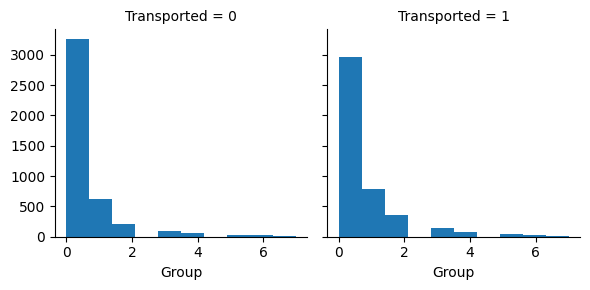

In [23]:
p = sns.FacetGrid(train_df, col='Transported')
p.map(plt.hist,'Group')

C:\Users\pfali\Desktop\Pyton\Venv\Lib\Kaggle\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


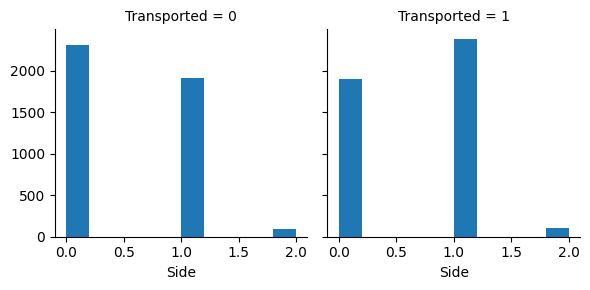

In [24]:
p = sns.FacetGrid(train_df, col='Transported')
p.map(plt.hist,'Side')

C:\Users\pfali\Desktop\Pyton\Venv\Lib\Kaggle\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


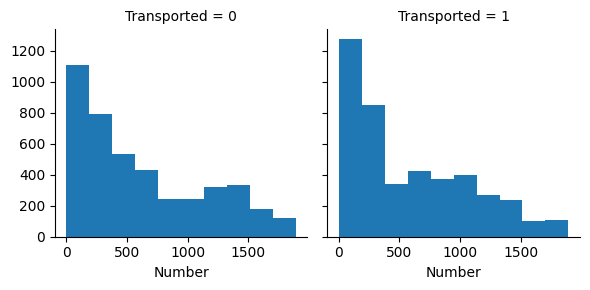

In [25]:
p = sns.FacetGrid(train_df, col='Transported')
p.map(plt.hist,'Number')

#The plots show that FoodCourt, RoomService, Spa, VRDeck, ShoppingMall have large tails, therefore should be bucketized

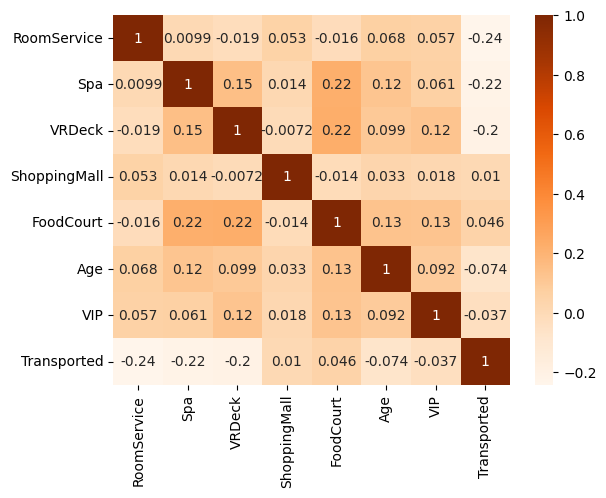

In [26]:
#checking correlations between target and input features

def corrheatmap(df):
    hm = sns.heatmap(df.corr(), annot=True,cmap='Oranges')
    plt.show()

corrheatmap(train_df[['RoomService','Spa','VRDeck','ShoppingMall','FoodCourt','Age','VIP','Transported']])

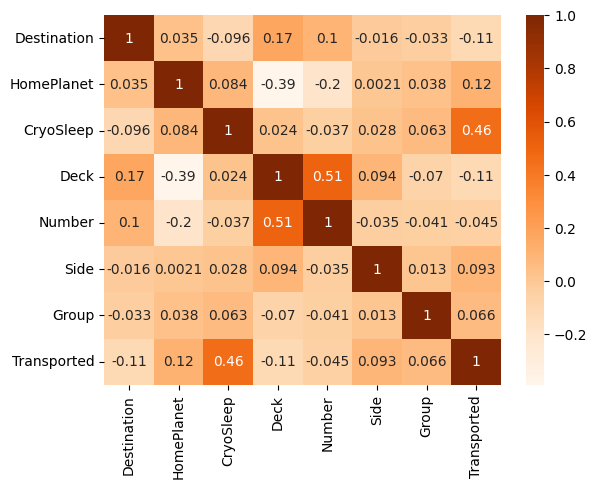

In [27]:
#checking correlations between target and input features

def corrheatmap(df):
    hm = sns.heatmap(df.corr(), annot=True,cmap='Oranges')
    plt.show()

corrheatmap(train_df[['Destination','HomePlanet','CryoSleep','Deck','Number','Side','Group','Transported']])

#Both heatmaps show the greatest correlation between the targe and features CryoSleep, HomePlanet, Side, Group. Hence, one could decide to drop other features, but this could result in overfitting the data, so all features will be left for training.

In [28]:
#exclude features

drop_column = ['Name','Cabin','Spa','VRDeck','FoodCourt','ShoppingMall','RoomService','Id','Number','Age','PassengerId']

train_df.drop(drop_column, axis=1, inplace=True)
test_df.drop(drop_column, axis=1, inplace=True)


In [29]:
print(train_df.dtypes)

HomePlanet            int32
CryoSleep             int64
Destination           int32
VIP                   int64
Transported           int64
Group                 int32
Deck                float64
Side                float64
AgeBin             category
RoomServiceBin     category
SpaBin             category
VRDeckBin          category
ShoppingMallBin    category
NumberBin          category
FoodCourtBin       category
dtype: object


In [30]:
print(test_df.dtypes)

HomePlanet            int32
CryoSleep             int64
Destination           int32
VIP                   int64
Group                 int32
Deck                float64
Side                float64
AgeBin             category
RoomServiceBin     category
SpaBin             category
VRDeckBin          category
ShoppingMallBin    category
NumberBin          category
FoodCourtBin       category
dtype: object


In [31]:
#transform bins

train_df['AgeBin'] = labelenc.fit_transform(train_df['AgeBin'])
train_df['RoomServiceBin'] = labelenc.fit_transform(train_df['RoomServiceBin'])
train_df['SpaBin'] = labelenc.fit_transform(train_df['SpaBin'])
train_df['VRDeckBin'] = labelenc.fit_transform(train_df['VRDeckBin'])
train_df['NumberBin'] = labelenc.fit_transform(train_df['NumberBin'])
train_df['ShoppingMallBin'] = labelenc.fit_transform(train_df['ShoppingMallBin'])
train_df['FoodCourtBin'] = labelenc.fit_transform(train_df['FoodCourtBin'])

test_df['AgeBin'] = labelenc.fit_transform(test_df['AgeBin'])
test_df['RoomServiceBin'] = labelenc.fit_transform(test_df['RoomServiceBin'])
test_df['SpaBin'] = labelenc.fit_transform(test_df['SpaBin'])
test_df['VRDeckBin'] = labelenc.fit_transform(test_df['VRDeckBin'])
test_df['NumberBin'] = labelenc.fit_transform(test_df['NumberBin'])
test_df['ShoppingMallBin'] = labelenc.fit_transform(test_df['ShoppingMallBin'])
test_df['FoodCourtBin'] = labelenc.fit_transform(test_df['FoodCourtBin'])



In [32]:
print(train_df.dtypes)

HomePlanet           int32
CryoSleep            int64
Destination          int32
VIP                  int64
Transported          int64
Group                int32
Deck               float64
Side               float64
AgeBin               int32
RoomServiceBin       int32
SpaBin               int32
VRDeckBin            int32
ShoppingMallBin      int32
NumberBin            int32
FoodCourtBin         int32
dtype: object


In [33]:
print(test_df.dtypes)

HomePlanet           int32
CryoSleep            int64
Destination          int32
VIP                  int64
Group                int32
Deck               float64
Side               float64
AgeBin               int32
RoomServiceBin       int32
SpaBin               int32
VRDeckBin            int32
ShoppingMallBin      int32
NumberBin            int32
FoodCourtBin         int32
dtype: object


In [60]:
import xgboost as xgb

X_train = train_df.drop('Transported', axis=1)
Y_train = train_df['Transported']
X_test = test_df.values

gbm = xgb.XGBClassifier(
    #learning_rate = 0.02,
 n_estimators= 2000,
 max_depth= 4,
 min_child_weight= 2,
 #gamma=1,
 gamma=0.9,                        
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1).fit(X_train, Y_train)
xgb_predictions = gbm.predict(X_test)

acc_random_forest = round(rf.score(X_train, Y_train) * 100, 2)
acc_random_forest

print("Accuracy is ", acc_random_forest)


Accuracy is  87.2
